In [6]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#data importation (corruption index)
pd.read_csv(r'C:\Users\harun\Desktop\Data\corruption.csv') 
corruption=pd.read_csv(r'C:\Users\harun\Desktop\Data\corruption.csv')

In [8]:
#changing index to the date 
corruption_labelled = corruption.set_index('Date')

In [169]:
#slicing 
corruption_labelled_2019 = corruption_labelled.loc[2019][['country','Value']]


In [10]:
#sorting df in ascending order using country
corruption_new = corruption_labelled_2019.sort_values('country')

In [11]:
#Nested if (conditional) statement to return a new column "rank"
#Defining a new function (rank)
def rank(df):
    if df['Value'] <= 40:
        return 'Very clean'
    elif df['Value'] > 40 and df['Value'] <= 80:
        return 'Clean'
    elif df['Value'] > 80 and df['Value'] <= 120:
        return 'Average'
    elif df['Value'] > 120 and df['Value'] <= 160:
        return 'Corrupt'
    else:
    #elif df['Value'] > 160 and df['Value'] <= 200:
        return 'Highly Corrupt'


In [12]:
corruption_new['rank'] = corruption_new.apply(rank, axis=1)


In [13]:
#Renaming a column
corruption_final = corruption_new.rename(columns={'Value':'corruption index'})
corruption_final.shape

(179, 3)

In [150]:
#Data importation (life expectancy)
life_exp = pd.read_csv(r'C:\Users\harun\Desktop\Data\life_expectancy.csv')

In [16]:
#Setting date as index
life_exp_labelled =life_exp.set_index('Date')

In [17]:
#SLicing the rows by 2019 (dropping all 2018 rows) and dropping some colums
life_exp_labelled1 = life_exp_labelled.loc[2019][['country','Value']]

In [71]:
#Renaming column from 'value' to 'years'
life_exp_new = life_exp_labelled1.rename(columns={'Value':'life exp(yrs)'})

#Sorting in alphabetical order
life_exp_new1 = life_exp_new.sort_values('country')

#Rounding up values
life_exp_final = life_exp_new1.round({'life exp(yrs)':0})

In [151]:
#Data importation (GDP per capita)
GDP = pd.read_csv(r'C:\Users\harun\Desktop\Data\GDP.csv')

In [21]:
#Setting date as index
GDP_labelled = GDP.set_index('Date')

In [22]:
#SLicing the rows by 2019 (dropping all 2018 and 2020 rows)
GDP_labelled1 = GDP_labelled.loc[2019][['country','Value']]

#sort in ascending order
GDP_sorted = GDP_labelled1.sort_values('country')

#Renaming a column from 'value' to 'gdp'
GDP_final = GDP_sorted.rename(columns={'Value':'gdp'})

#Rounding up to 2 decimal places
GDP_final.round({'gdp':2})

,country,gdp
Date,,
2019,Afghanistan,573.29
2019,Africa Eastern and Southern,1598.38
2019,Albania,5207.31
2019,Algeria,4701.28
2019,American Samoa,9445.81
...,...,...
2019,Vanuatu,2865.79
2019,Vietnam,2082.24
2019,West Bank and Gaza,2951.37


In [23]:
#Data importation (population 2019)
population = pd.read_csv(r'C:\Users\harun\Desktop\Data\population.csv')

In [24]:
#Renaming a column 
population_new = population.rename(columns={'Population in thousands':'population'})

#sort in ascending order
population_sorted = population_new.sort_values('country')

#Round up values to nearest thousand
population_sorted1 = population_sorted.round({"population":0})
population_sorted1.shape

(203, 2)

In [25]:
#Data Importation (Natural resource rent share of GDP)
Nat_res = pd.read_csv(r'C:\Users\harun\Desktop\Data\Nat_res.csv') 

Nat_res.shape

(188, 2)

In [26]:
#Sort in ascending order using country
Nat_res1 = Nat_res.sort_values('country')

#Round up 'Natural resource' to 2 decimal places
Nat_res2 = Nat_res1.round({"Natural resource rent share of GDP%":2})
Nat_res2.head(10)

,country,Natural resource rent share of GDP%
135,Afghanistan,0.77
30,Albania,1.59
113,Algeria,16.42
31,Andorra,0.00
143,Angola,26.19
79,Antigua and Barbuda,0.00
80,Argentina,2.07
32,Armenia,2.11
1,Australia,5.36
33,Austria,0.13


In [30]:
#Merging dataframes Corruption and life expectancy
corruption_merged = corruption_final.merge(life_exp_final,how = 'left')

#Merging dataframes new_df and GDP per capita
new_df = corruption_merged.merge(GDP_final, how = 'left')


#Merging dataframes new_df1 and population
new_df1 = new_df.merge(population_sorted1, how = 'left')


#Merging dataframes new_df2 and Natural resource
new_df2 = new_df1.merge(Nat_res2, how = 'left')

new_df3 = new_df2.merge(food_prod, how = 'left')


In [167]:
#Importing data API

import requests
from bs4 import BeautifulSoup as bs
country_codes = requests.get("https://country-code.cl/")
country_codes
country_codes2 = bs(country_codes.content, 'lxml')
table = count_codes2.find("table", {"class":"tablesorter mark"})
API_table2 = pd.read_html(str(table))[0]
API_table2.head(2)

#table = count_codes("table","{<title>Country code list - World countries</title>"})


,Continent,Unnamed: 1,Name,ISO 2,ISO 3,CIA,Telephone,Internet,Vehicle
0,AS,NaN,Afghanistan,AF,AFG,af,93,.af,AFG
1,EU,NaN,Åland Islands,AX,ALA,fi,358 18,.ax,AX


In [168]:
#Renaming a column
API_table3 = API_table2.rename(columns={'Name':'country',})

#Returning multiple columns
list = ['Continent','country', 'ISO 2']
API_table4 = API_table3[list]
API_table4.head(2)

,Continent,country,ISO 2
0,AS,Afghanistan,AF
1,EU,Åland Islands,AX


In [145]:
#Merging new_df2 with API_table2

new_df3 = new_df2.merge(API_table4, how = 'left')

#Setting index to ISO code
new_df4 = new_df3.set_index('ISO 2')

,country,corruption index,rank,life exp(yrs),gdp,population,Natural resource rent share of GDP%,Continent
ISO 2,,,,,,,,
AF,Afghanistan,173,Highly Corrupt,65.0,573.287506,38051.0,0.77,AS
AL,Albania,106,Average,79.0,5207.305322,2880.0,1.59,EU
DZ,Algeria,106,Average,77.0,4701.279743,43030.0,16.42,AF
AO,Angola,146,Corrupt,61.0,3111.157308,31850.0,26.19,AF
AR,Argentina,66,Clean,77.0,9742.455417,44833.0,2.07,SA
AM,Armenia,77,Clean,75.0,4732.074306,2957.0,2.11,AS
AU,Australia,12,Very clean,83.0,57183.379350,25408.0,5.36,OC
AT,Austria,12,Very clean,82.0,50536.664150,8885.0,0.13,EU
AZ,Azerbaijan,126,Corrupt,73.0,5895.198986,10041.0,25.46,AS


<AxesSubplot:xlabel='gdp', ylabel='life exp(yrs)'>

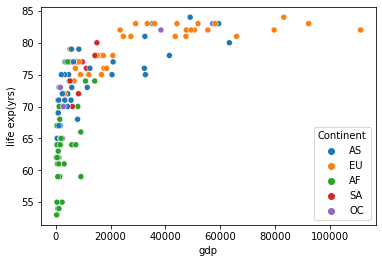

In [159]:
sns.scatterplot(data = new_df4, x = 'gdp',y = 'life exp(yrs)',hue = "Continent")

<AxesSubplot:xlabel='gdp', ylabel='country'>

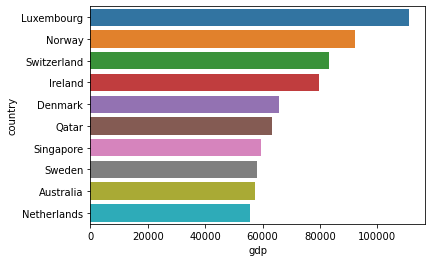

In [214]:
#Sorted dataframe in descending order using the column 'gdp' to see countries with highest gdp
df_sorted_gdp = new_df4.sort_values('gdp',ascending = False)


#Sliced to see top 10 countries by gdp
df_sorted_top10 = df_sorted_gdp[:10]

#plotting bar chart
sns.barplot(data = df_sorted_top10, y = 'country', x = 'gdp',)


<AxesSubplot:xlabel='gdp', ylabel='country'>

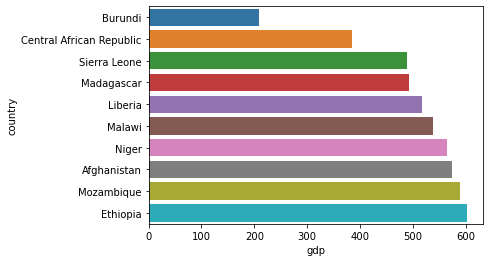

In [221]:
#Sorted dataframe in ascending order using the column 'gdp' to ses countries with lowest gdp
df_sorted_gdp2 = new_df4.sort_values('gdp', ascending = True)

#Sliced to see lowest 10 countries by gdp
df_sorted_low10 = df_sorted_gdp2[:10]

sns.barplot(data = df_sorted_low10, y = 'country', x = 'gdp')

<AxesSubplot:xlabel='gdp', ylabel='corruption index'>

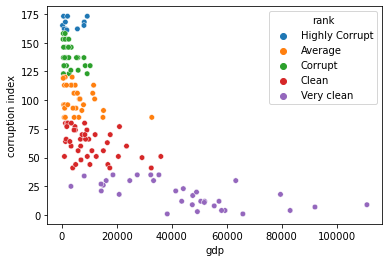

In [172]:
sns.scatterplot(data = new_df3, x = 'gdp',y = 'corruption index', hue = 'rank', s = 30) 

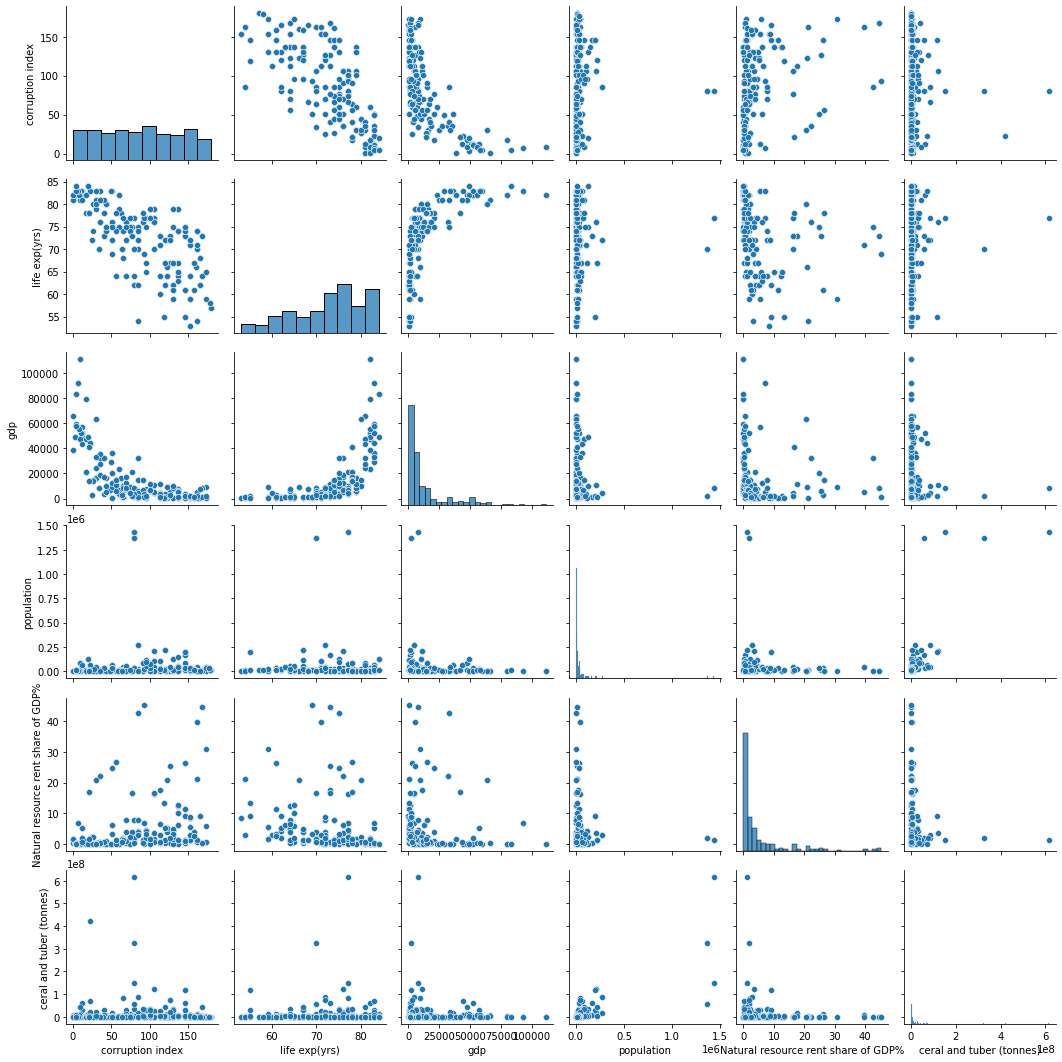

In [356]:
sns.pairplot(new_df3)

<AxesSubplot:xlabel='gdp', ylabel='Natural resource rent share of GDP%'>

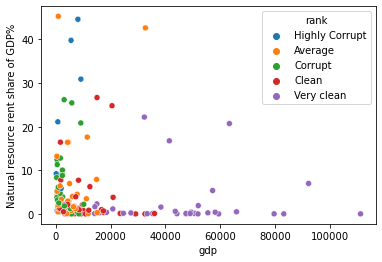

In [345]:
sns.scatterplot(data = new_df2, y = 'Natural resource rent share of GDP%',x = 'gdp', hue = 'rank')